In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('mfeat-pix.txt', sep="  ", header=None, engine='python')

In [4]:
def train_test_split(data):
  """
  Function for seperating test data from training data
  """
  x_train, x_test = pd.DataFrame(), pd.DataFrame()
  y = pd.DataFrame()

  for i in range(int(len(data.index) / 200)):
    df_number = data.iloc[i*200:i*200+200]
    x_train = pd.concat([x_train, df_number.iloc[0:100]], ignore_index=True)
    x_test = pd.concat([x_test, df_number.iloc[100:200]], ignore_index=True)
    y = pd.concat([y, pd.DataFrame(np.repeat(i, 100))], ignore_index=True)

  return (x_train, y), (x_test, y)

(x_train, y_train), (x_test, y_test) = train_test_split(data)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

Accuracy: 0.96
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.86      0.99      0.92       100
           2       0.99      0.98      0.98       100
           3       0.96      0.94      0.95       100
           4       0.97      0.93      0.95       100
           5       0.93      0.95      0.94       100
           6       1.00      0.95      0.97       100
           7       0.98      0.99      0.99       100
           8       0.98      0.94      0.96       100
           9       0.98      0.97      0.97       100

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



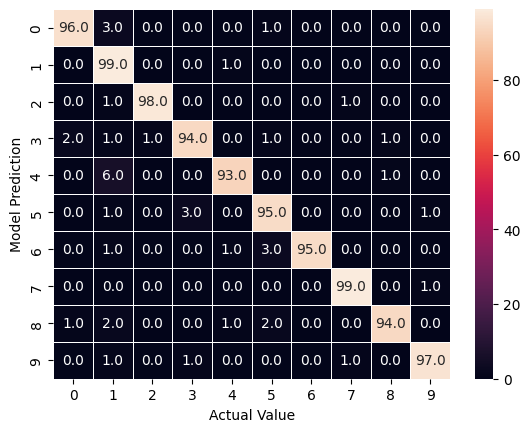

In [46]:
# Make prediction
y_pred = model.predict(x_test)

# Output results
cf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {}\n".format(acc), report)

ax = sns.heatmap(cf_matrix, linewidth=0.5, annot=True, fmt=".1f")
ax.set(xlabel='Actual Value', ylabel='Model Prediction')
plt.show()
